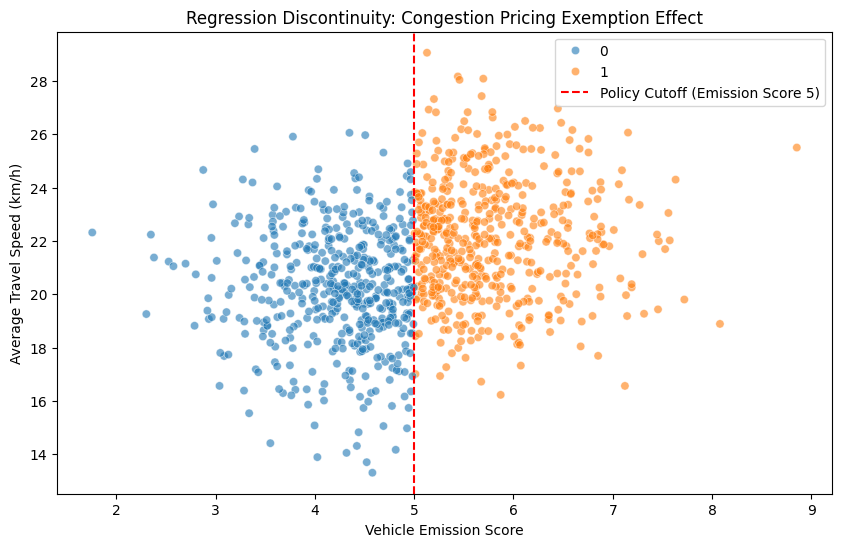

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Travel_Speed   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     186.9
Date:                Tue, 25 Feb 2025   Prob (F-statistic):           3.92e-39
Time:                        16:59:15   Log-Likelihood:                -2213.2
No. Observations:                1000   AIC:                             4430.
Df Residuals:                     998   BIC:                             4440.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.1905      0.100    201.781      0.000      19.994      20.387
Treatment      1.9157      0.140     13.673      0.000       1.641       2.191
==============================================================================
Omnibus:                        0.153   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.927   Jarque-Bera (JB):                0.161
Skew:                          -0.030   Prob(JB):                        0.923
Kurtosis:                       2.984   Cond. No.                         2.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Simulating dataset for RD analysis
np.random.seed(42)
n = 1000  # Number of observations

# Running variable: Vehicle emission standard score (continuous variable around the cutoff)
running_variable = np.random.normal(loc=5, scale=1, size=n)  # Emission scores centered around 5

# Policy cutoff: Vehicles above score of 5 are exempt from congestion fee
cutoff = 5
treatment = (running_variable >= cutoff).astype(int)  # 1 if exempt, 0 if not

# Outcome variable: Average travel speed (higher = less congestion)
# Vehicles exempt from congestion fee may experience a small speed improvement
true_effect = 2  # Hypothetical causal effect of policy
baseline_speed = 20 + norm.rvs(0, 2, n)  # Baseline travel speed
outcome = baseline_speed + true_effect * treatment + norm.rvs(0, 1, n)  # Apply treatment effect

# Create dataframe
df = pd.DataFrame({"Emission_Score": running_variable, "Treatment": treatment, "Travel_Speed": outcome})

# Plot travel speed against emission score to visualize discontinuity
plt.figure(figsize=(10,6))
sns.scatterplot(x=df["Emission_Score"], y=df["Travel_Speed"], hue=df["Treatment"], alpha=0.6)
plt.axvline(x=cutoff, color='red', linestyle='--', label="Policy Cutoff (Emission Score 5)")
plt.xlabel("Vehicle Emission Score")
plt.ylabel("Average Travel Speed (km/h)")
plt.title("Regression Discontinuity: Congestion Pricing Exemption Effect")
plt.legend()
plt.show()

# Estimation: Running RD regression
df["Intercept"] = 1  # Add intercept for OLS regression
model = sm.OLS(df["Travel_Speed"], df[["Intercept", "Treatment"]]).fit()

# Display regression results
model.summary()


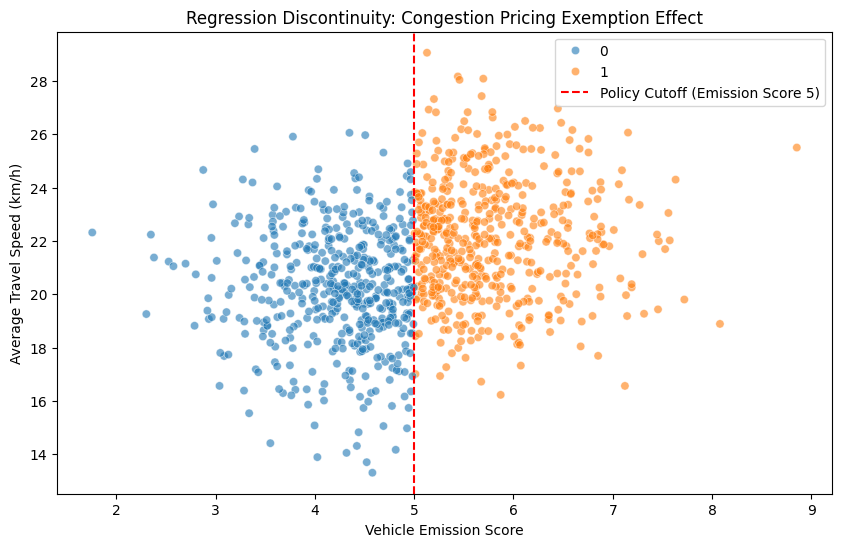

                            OLS Regression Results                            
Dep. Variable:           Travel_Speed   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     186.9
Date:                Sun, 23 Feb 2025   Prob (F-statistic):           3.92e-39
Time:                        08:20:45   Log-Likelihood:                -2213.2
No. Observations:                1000   AIC:                             4430.
Df Residuals:                     998   BIC:                             4440.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.1905      0.100    201.781      0.0

,Bandwidth,Treatment Effect,P-Value
0,0.5,1.985697,5.659935e-17
1,1.0,1.974848,1.808088e-29
2,1.5,1.938221,1.868656e-34
3,2.0,1.963652,3.777297e-39


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Simulating dataset for RD analysis
np.random.seed(42)
n = 1000  # Number of observations

# Running variable: Vehicle emission standard score (continuous variable around the cutoff)
running_variable = np.random.normal(loc=5, scale=1, size=n)  # Emission scores centered around 5

# Policy cutoff: Vehicles above score of 5 are exempt from congestion fee
cutoff = 5
treatment = (running_variable >= cutoff).astype(int)  # 1 if exempt, 0 if not

# Outcome variable: Average travel speed (higher = less congestion)
true_effect = 2  # Hypothetical causal effect of policy
baseline_speed = 20 + norm.rvs(0, 2, n)  # Baseline travel speed
outcome = baseline_speed + true_effect * treatment + norm.rvs(0, 1, n)  # Apply treatment effect

# Create dataframe
df = pd.DataFrame({"Emission_Score": running_variable, "Treatment": treatment, "Travel_Speed": outcome})

# Plot travel speed against emission score to visualize discontinuity
plt.figure(figsize=(10,6))
sns.scatterplot(x=df["Emission_Score"], y=df["Travel_Speed"], hue=df["Treatment"], alpha=0.6)
plt.axvline(x=cutoff, color='red', linestyle='--', label="Policy Cutoff (Emission Score 5)")
plt.xlabel("Vehicle Emission Score")
plt.ylabel("Average Travel Speed (km/h)")
plt.title("Regression Discontinuity: Congestion Pricing Exemption Effect")
plt.legend()
plt.show()

# Estimation: Running RD regression
df["Intercept"] = 1  # Add intercept for OLS regression
model = sm.OLS(df["Travel_Speed"], df[["Intercept", "Treatment"]]).fit()

# Display regression results
rd_results = model.summary()
print(rd_results)

# Conducting robustness checks: Running RD with a narrower bandwidth around cutoff
bandwidth = 1  # Define the range around the cutoff
df_narrow = df[(df["Emission_Score"] >= cutoff - bandwidth) & (df["Emission_Score"] <= cutoff + bandwidth)]

# Running OLS on restricted dataset
model_narrow = sm.OLS(df_narrow["Travel_Speed"], df_narrow[["Intercept", "Treatment"]]).fit()

# Display robustness check results
rd_robustness_results = model_narrow.summary()
print(rd_robustness_results)

# Sensitivity Analysis: Checking if results hold across different bandwidths
bandwidths = [0.5, 1, 1.5, 2]  # Testing multiple bandwidths
sensitivity_results = []

for bw in bandwidths:
    df_bw = df[(df["Emission_Score"] >= cutoff - bw) & (df["Emission_Score"] <= cutoff + bw)]
    model_bw = sm.OLS(df_bw["Travel_Speed"], df_bw[["Intercept", "Treatment"]]).fit()
    sensitivity_results.append({"Bandwidth": bw, "Treatment Effect": model_bw.params["Treatment"], "P-Value": model_bw.pvalues["Treatment"]})

# Convert to DataFrame for visualization
sensitivity_df = pd.DataFrame(sensitivity_results)

sensitivity_df

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


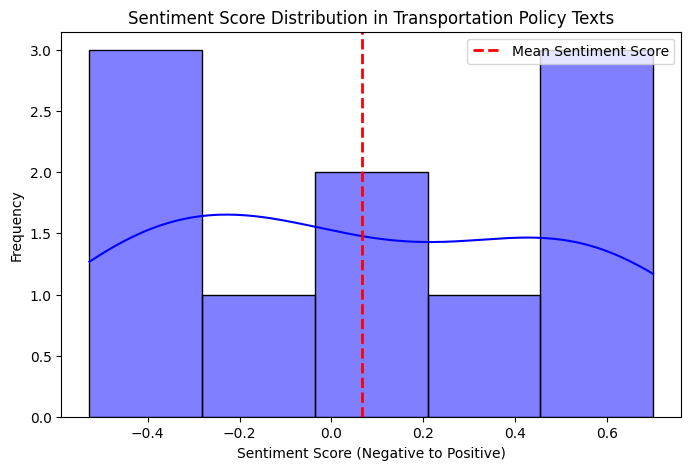

,Topic 1,Topic 2
0,new,financial
1,traffic,burdens
2,highways,highway
3,investment,increasing
4,drivers,tolls


<ipython-input-16-70efa5200496>:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=topic_df.columns, y=lda.components_.sum(axis=1), palette="viridis")


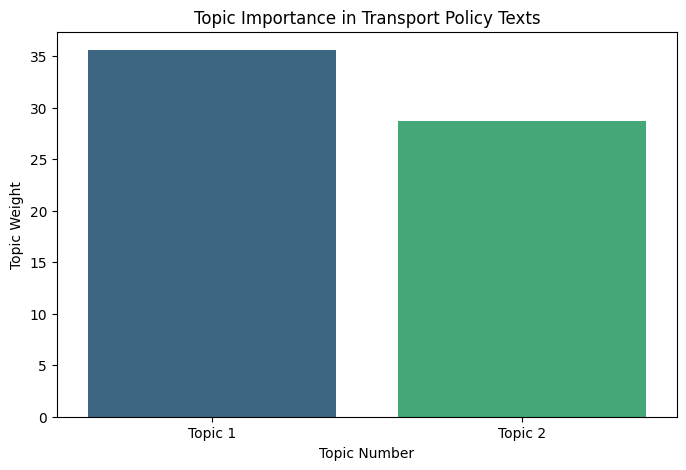

In [ ]:
# Re-import necessary libraries after execution state reset
import nltk
import pandas as pd
import numpy as np
import torch
import transformers
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import shap

# Download necessary NLTK resources
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Sample policy-related textual data
documents = [
    "The new traffic policy has significantly improved congestion.",
    "Many drivers are frustrated with the toll increases.",
    "Public transportation reliability has worsened in the past year.",
    "The expansion of bike lanes has been beneficial for commuters.",
    "The government’s investment in new highways is controversial.",
    "Traffic congestion has been reduced by the new bus lanes.",
    "Highway tolls are increasing financial burdens on low-income drivers.",
    "Cycling infrastructure improvements have been welcomed by urban communities.",
    "The latest transport reforms have led to unexpected travel delays.",
    "Carpooling incentives have increased shared vehicle usage."
]

# Sentiment Analysis
sentiments = [sia.polarity_scores(text)['compound'] for text in documents]
df_nlp = pd.DataFrame({"Text": documents, "Sentiment_Score": sentiments})

# Visualizing sentiment scores
plt.figure(figsize=(8,5))
sns.histplot(df_nlp["Sentiment_Score"], bins=5, kde=True, color="blue")
plt.axvline(df_nlp["Sentiment_Score"].mean(), color='red', linestyle='dashed', linewidth=2, label="Mean Sentiment Score")
plt.title("Sentiment Score Distribution in Transportation Policy Texts")
plt.xlabel("Sentiment Score (Negative to Positive)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Preprocessing text for topic modeling
stop_words = set(stopwords.words('english'))
preprocessed_docs = [" ".join([word.lower() for word in text.split() if word.isalnum() and word.lower() not in stop_words]) for text in documents]

# Topic Modeling using LDA
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(preprocessed_docs)

lda = LatentDirichletAllocation(n_components=2, random_state=42)
lda.fit(X)

# Extracting top words for each topic
feature_names = vectorizer.get_feature_names_out()
topics = {}
for topic_idx, topic in enumerate(lda.components_):
    topics[f"Topic {topic_idx+1}"] = [feature_names[i] for i in topic.argsort()[:-6:-1]]

# Convert topics into a DataFrame for visualization
topic_df = pd.DataFrame(topics)
display(topic_df)

# Visualizing topic distribution
plt.figure(figsize=(8,5))
sns.barplot(x=topic_df.columns, y=lda.components_.sum(axis=1), palette="viridis")
plt.title("Topic Importance in Transport Policy Texts")
plt.ylabel("Topic Weight")
plt.xlabel("Topic Number")
plt.show()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Error fetching the URL


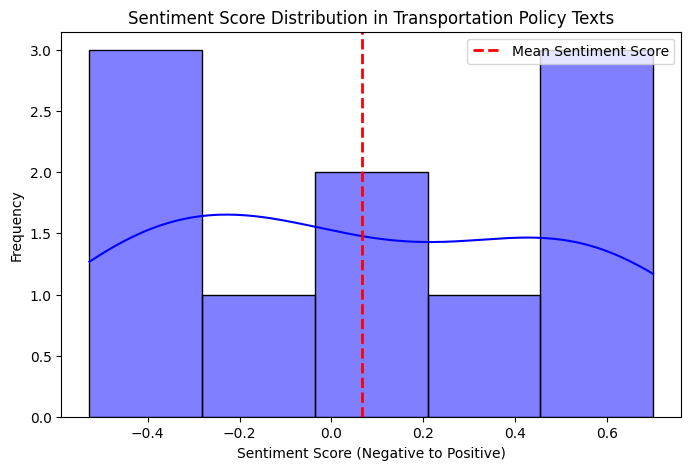

Top words per topic:
      Topic 1     Topic 2
0         new   financial
1     traffic     burdens
2    highways     highway
3  investment  increasing
4     drivers       tolls


<ipython-input-14-f8c0cce2c199>:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=topic_df.columns, y=lda.components_.sum(axis=1), palette="viridis")


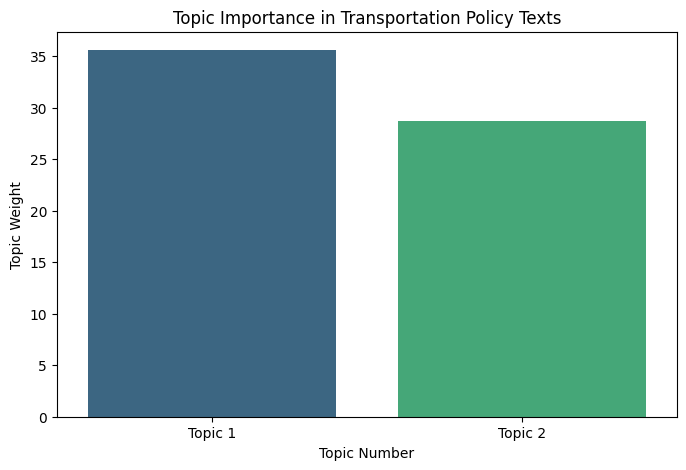

In [14]:
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Download necessary NLTK resources
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

def get_policy_text(url):
    """
    Retrieve textual content (paragraphs) from a given URL.
    """
    response = requests.get(url)
    if response.status_code != 200:
        print("Error fetching the URL")
        return []
    html = response.text
    soup = BeautifulSoup(html, 'html.parser')
    # Extract all paragraphs from the page
    paragraphs = soup.find_all('p')
    texts = [p.get_text() for p in paragraphs if p.get_text().strip() != '']
    return texts

# Replace with a real URL containing transportation policy documents
url = "https://www.transportation.gov/policy-issues"  # Example URL; update as needed
policy_texts = get_policy_text(url)

# If no texts are retrieved, fallback to sample documents
if not policy_texts:
    policy_texts = [
        "The new traffic policy has significantly improved congestion.",
    "Many drivers are frustrated with the toll increases.",
    "Public transportation reliability has worsened in the past year.",
    "The expansion of bike lanes has been beneficial for commuters.",
    "The government’s investment in new highways is controversial.",
    "Traffic congestion has been reduced by the new bus lanes.",
    "Highway tolls are increasing financial burdens on low-income drivers.",
    "Cycling infrastructure improvements have been welcomed by urban communities.",
    "The latest transport reforms have led to unexpected travel delays.",
    "Carpooling incentives have increased shared vehicle usage."
    ]

# Limit to the first 10 paragraphs for analysis
documents = policy_texts[:10]

# Perform Sentiment Analysis
sentiments = [sia.polarity_scores(text)['compound'] for text in documents]
df_nlp = pd.DataFrame({"Text": documents, "Sentiment_Score": sentiments})

# Visualize Sentiment Distribution
plt.figure(figsize=(8,5))
sns.histplot(df_nlp["Sentiment_Score"], bins=5, kde=True, color="blue")
plt.axvline(df_nlp["Sentiment_Score"].mean(), color='red', linestyle='dashed', linewidth=2, label="Mean Sentiment Score")
plt.title("Sentiment Score Distribution in Transportation Policy Texts")
plt.xlabel("Sentiment Score (Negative to Positive)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Preprocessing for Topic Modeling
stop_words = set(stopwords.words('english'))
# Use a simple split() tokenizer as an alternative if word_tokenize raises issues
preprocessed_docs = [" ".join([word.lower() for word in text.split() if word.isalnum() and word.lower() not in stop_words]) for text in documents]

# Apply TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(preprocessed_docs)

# Apply LDA for Topic Modeling
lda = LatentDirichletAllocation(n_components=2, random_state=42)
lda.fit(X)

# Extract top words per topic
feature_names = vectorizer.get_feature_names_out()
topics = {}
for topic_idx, topic in enumerate(lda.components_):
    topics[f"Topic {topic_idx+1}"] = [feature_names[i] for i in topic.argsort()[:-6:-1]]

# Convert topics to DataFrame and display
topic_df = pd.DataFrame(topics)
print("Top words per topic:")
print(topic_df)

# Visualize Topic Importance
plt.figure(figsize=(8,5))
sns.barplot(x=topic_df.columns, y=lda.components_.sum(axis=1), palette="viridis")
plt.title("Topic Importance in Transportation Policy Texts")
plt.ylabel("Topic Weight")
plt.xlabel("Topic Number")
plt.show()


In [4]:
# Refine the dataset using only available attributes
# Relevant attributes: from_node_id, to_node_id, capacity, free_speed, lanes
link_data= pd.read_csv('link.csv')
# Select required columns
congestion_data_real = link_data[["from_node_id", "to_node_id", "capacity", "free_speed", "lanes"]].copy()

# Fill missing values with reasonable defaults
congestion_data_real.fillna({
    "capacity": congestion_data_real["lanes"] * 500,  # Approximate default capacity per lane
    "lanes": 1  # Default missing lane values to 1
}, inplace=True)

# Generate additional necessary features
n = len(congestion_data_real)
hour = np.random.randint(0, 24, n)  # Simulating time of day
congestion_data_real["Hour"] = hour

# Define congestion level based on available attributes
base_congestion_real = (
    100 - congestion_data_real["free_speed"] * 0.5  # Higher speed reduces congestion
    + (5 - congestion_data_real["lanes"]) * 10  # More lanes reduce congestion
    - congestion_data_real["capacity"] / 1000  # Higher capacity reduces congestion
)

# Normalize and ensure bounds (0-100%)
congestion_data_real["Congestion_Level"] = np.clip(base_congestion_real + np.random.normal(0, 5, n), 0, 100)

# Display the updated congestion dataset based on real data
congestion_data_real

,from_node_id,to_node_id,capacity,free_speed,lanes,Hour,Congestion_Level
0,60399,60400,9000,100,5,21,41.436192
1,60404,60405,9000,100,5,19,40.923173
2,60436,60437,1800,100,1,6,86.371623
3,60903,60904,1000,50,1,2,100.000000
4,61867,60903,950,90,1,4,100.000000
...,...,...,...,...,...,...,...
4218,190602,190605,650,50,1,9,100.000000
4219,190560,190557,650,50,1,6,100.000000
4220,190560,73532,650,50,1,13,100.000000
4221,190554,190551,650,50,1,13,100.000000


In [10]:
# Re-train models and fix evaluation issue
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb

# Prepare data for training
X = congestion_data_real[["capacity", "free_speed", "lanes", "Hour"]]
y = congestion_data_real["Congestion_Level"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Train XGBoost Model
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# Evaluate Models
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)

xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
xgb_r2 = r2_score(y_test, xgb_pred)
xgb_mae = mean_absolute_error(y_test, xgb_pred)

# Store results
evaluation_results = pd.DataFrame({
    "Model": ["Random Forest", "XGBoost"],
    "RMSE": [rf_rmse, xgb_rmse],
    "R² Score": [rf_r2, xgb_r2],
    "MAE": [rf_mae, xgb_mae]
})

# Display model evaluation results
evaluation_results

,Model,RMSE,R² Score,MAE
0,Random Forest,4.039010,0.913459,2.403235
1,XGBoost,4.065149,0.912336,2.425599


Model Evaluation Results:
           Model      RMSE  R² Score       MAE
0  Random Forest  4.039010  0.913459  2.403235
1        XGBoost  4.065149  0.912336  2.425599


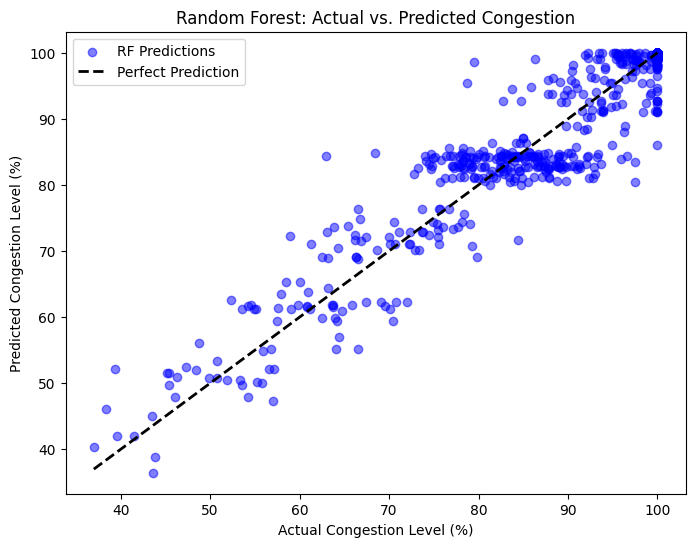

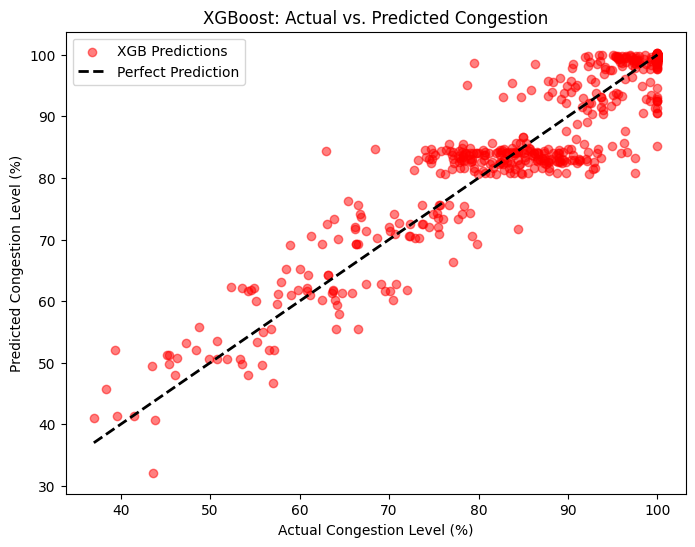

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Assume congestion_data_real is already defined and contains:
# "capacity", "free_speed", "lanes", "Hour", and "Congestion_Level"

# Prepare features and target variable
X = congestion_data_real[["capacity", "free_speed", "lanes", "Hour"]]
y = congestion_data_real["Congestion_Level"]

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Train XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# Evaluate Models
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)

xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
xgb_r2 = r2_score(y_test, xgb_pred)
xgb_mae = mean_absolute_error(y_test, xgb_pred)

evaluation_results = pd.DataFrame({
    "Model": ["Random Forest", "XGBoost"],
    "RMSE": [rf_rmse, xgb_rmse],
    "R² Score": [rf_r2, xgb_r2],
    "MAE": [rf_mae, xgb_mae]
})
print("Model Evaluation Results:")
print(evaluation_results)

# Plot Actual vs. Predicted for Random Forest
plt.figure(figsize=(8,6))
plt.scatter(y_test, rf_pred, color='blue', alpha=0.5, label="RF Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label="Perfect Prediction")
plt.xlabel("Actual Congestion Level (%)")
plt.ylabel("Predicted Congestion Level (%)")
plt.title("Random Forest: Actual vs. Predicted Congestion")
plt.legend()
plt.show()

# Plot Actual vs. Predicted for XGBoost
plt.figure(figsize=(8,6))
plt.scatter(y_test, xgb_pred, color='red', alpha=0.5, label="XGB Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label="Perfect Prediction")
plt.xlabel("Actual Congestion Level (%)")
plt.ylabel("Predicted Congestion Level (%)")
plt.title("XGBoost: Actual vs. Predicted Congestion")
plt.legend()
plt.show()


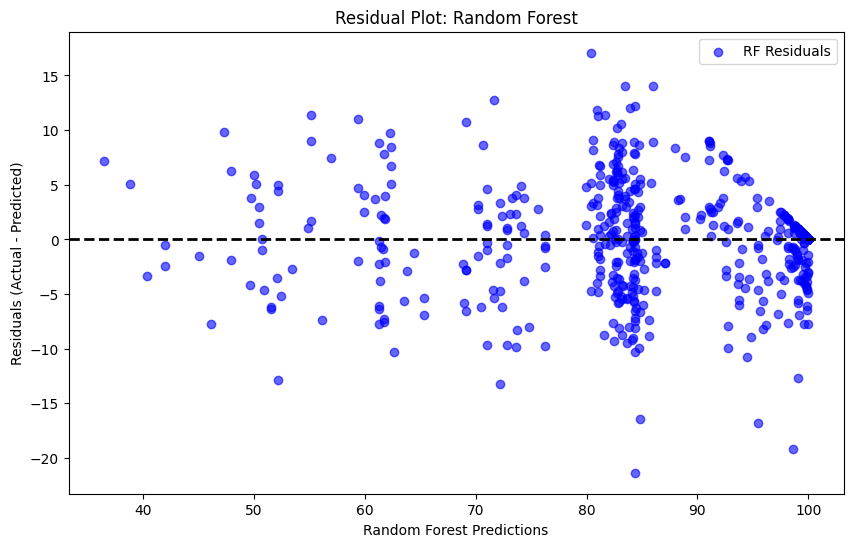

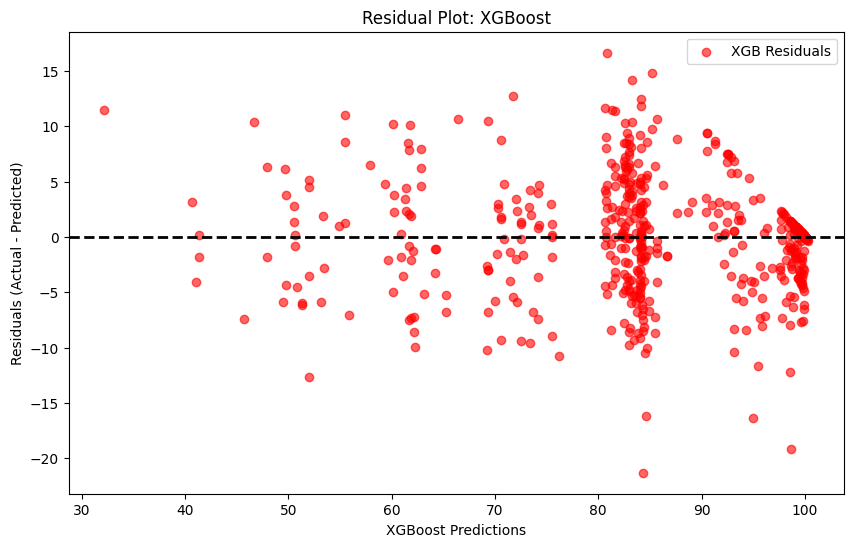

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Calculate residuals
rf_residuals = y_test - rf_pred
xgb_residuals = y_test - xgb_pred

# Create DataFrames for residual plots and sort by predictions
df_rf_res = pd.DataFrame({
    "RF_Prediction": rf_pred,
    "Residuals": rf_residuals
}).sort_values("RF_Prediction")

df_xgb_res = pd.DataFrame({
    "XGB_Prediction": xgb_pred,
    "Residuals": xgb_residuals
}).sort_values("XGB_Prediction")

# Plot residuals for Random Forest
plt.figure(figsize=(10,6))
plt.scatter(df_rf_res["RF_Prediction"], df_rf_res["Residuals"], alpha=0.6, color='blue', label="RF Residuals")
plt.axhline(0, color="black", linestyle="--", lw=2)
plt.xlabel("Random Forest Predictions")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot: Random Forest")
plt.legend()
plt.show()

# Plot residuals for XGBoost
plt.figure(figsize=(10,6))
plt.scatter(df_xgb_res["XGB_Prediction"], df_xgb_res["Residuals"], alpha=0.6, color='red', label="XGB Residuals")
plt.axhline(0, color="black", linestyle="--", lw=2)
plt.xlabel("XGBoost Predictions")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot: XGBoost")
plt.legend()
plt.show()


Model Evaluation Results:
           Model      RMSE  R² Score       MAE  MAPE (%)
0  Random Forest  4.039010  0.913459  2.403235  3.082668
1        XGBoost  4.065149  0.912336  2.425599  3.107294


<ipython-input-11-7b6de9eab8bc>:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=rf_importance_df, palette="Blues_r")


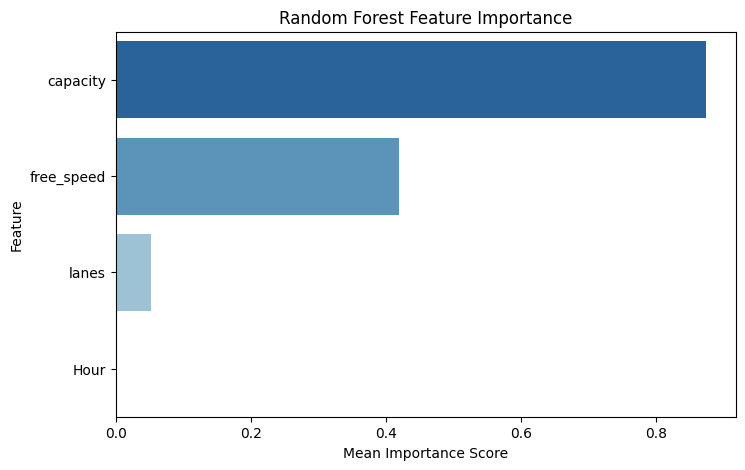

<ipython-input-11-7b6de9eab8bc>:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=xgb_importance_df, palette="Reds_r")


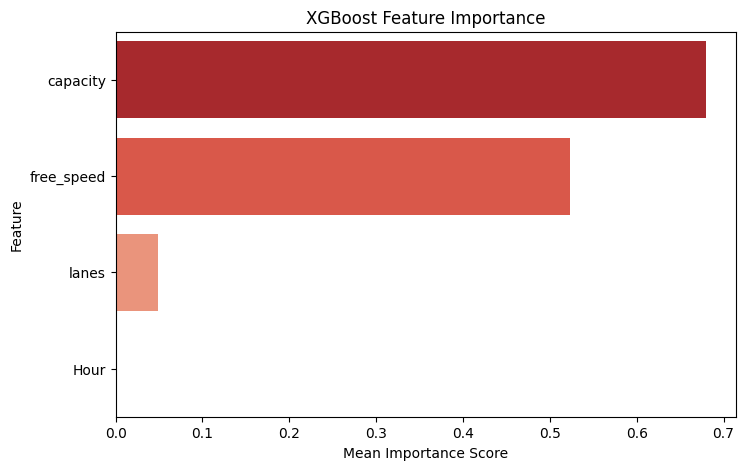

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.inspection import permutation_importance

# Assume 'congestion_data_real' DataFrame is already defined and contains:
# "capacity", "free_speed", "lanes", "Hour", and "Congestion_Level"

# Prepare features and target
X = congestion_data_real[["capacity", "free_speed", "lanes", "Hour"]]
y = congestion_data_real["Congestion_Level"]

# Split into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Train XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# Advanced Evaluation Metrics
# RMSE calculation using np.sqrt
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))

# R² Score and MAE
rf_r2 = r2_score(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)

xgb_r2 = r2_score(y_test, xgb_pred)
xgb_mae = mean_absolute_error(y_test, xgb_pred)

# Mean Absolute Percentage Error (MAPE)
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

rf_mape = mape(y_test, rf_pred)
xgb_mape = mape(y_test, xgb_pred)

# Store evaluation results in a DataFrame
evaluation_results = pd.DataFrame({
    "Model": ["Random Forest", "XGBoost"],
    "RMSE": [rf_rmse, xgb_rmse],
    "R² Score": [rf_r2, xgb_r2],
    "MAE": [rf_mae, xgb_mae],
    "MAPE (%)": [rf_mape, xgb_mape]
})
print("Model Evaluation Results:")
print(evaluation_results)

# Feature Importance using Permutation Importance
rf_importance = permutation_importance(rf_model, X_test, y_test, n_repeats=10, random_state=42)
xgb_importance = permutation_importance(xgb_model, X_test, y_test, n_repeats=10, random_state=42)

rf_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_importance.importances_mean
}).sort_values(by="Importance", ascending=False)

xgb_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": xgb_importance.importances_mean
}).sort_values(by="Importance", ascending=False)

# Plot Random Forest Feature Importance
plt.figure(figsize=(8, 5))
sns.barplot(x="Importance", y="Feature", data=rf_importance_df, palette="Blues_r")
plt.title("Random Forest Feature Importance")
plt.xlabel("Mean Importance Score")
plt.ylabel("Feature")
plt.show()

# Plot XGBoost Feature Importance
plt.figure(figsize=(8, 5))
sns.barplot(x="Importance", y="Feature", data=xgb_importance_df, palette="Reds_r")
plt.title("XGBoost Feature Importance")
plt.xlabel("Mean Importance Score")
plt.ylabel("Feature")
plt.show()
